In [2]:
from model_uns_optimization_pipeline.model_selection_pipeline import RunPSO

In [ ]:
import importlib
import model_uns_optimization_pipeline.optimize_params
import model_uns_optimization_pipeline.model_selection_pipeline

# Reload the module
importlib.reload(model_uns_optimization_pipeline.optimize_params)
importlib.reload(model_uns_optimization_pipeline.model_selection_pipeline)

In [4]:
data_path = 'pre_process_pipeline/scale_data'
data = RunPSO(data_path, swarmsize=10, maxiter=10, verbose=True)

dfs = data.run()

Failed to create directory 'result_unsup': [Errno 17] File exists: 'result_unsup'
Optimize data: 1_2_1.csv
KMeans
1_2_1.csv: 0.06704301989593126
1_2_1.csv: 0.06704301989593126
1_2_1.csv: 0.06704301989593126
1_2_1.csv: 0.06704301989593126
1_2_1.csv: 0.06704301989593126
1_2_1.csv: 0.06704301989593126
1_2_1.csv: 0.06704301989593126
1_2_1.csv: 0.07775572895468796
1_2_1.csv: 0.06704301989593126
1_2_1.csv: 0.06704301989593126
1_2_1.csv: 0.06704301989593126
1_2_1.csv: 0.07691454458640737
1_2_1.csv: 0.06704301989593126
1_2_1.csv: 0.06704301989593126
1_2_1.csv: 0.06704301989593126
1_2_1.csv: 0.06704301989593126
1_2_1.csv: 0.06704301989593126
1_2_1.csv: 0.07741547951680458
1_2_1.csv: 0.06704301989593126
1_2_1.csv: 0.06704301989593126
1_2_1.csv: 0.06704301989593126
1_2_1.csv: 0.06704301989593126
1_2_1.csv: 0.06704301989593126
1_2_1.csv: 0.06704301989593126
1_2_1.csv: 0.06704301989593126
1_2_1.csv: 0.07843294297777917
1_2_1.csv: 0.06704301989593126
1_2_1.csv: 0.06704301989593126
1_2_1.csv: 0.06704

KeyboardInterrupt: 

In [126]:
import json
from collections import defaultdict

datas = [
    {
        'file_name': f'result/{i}_{j}_{k}.json',
        'value': json.load(open(f'result/{i}_{j}_{k}.json'))
    }
    for i in range(1, 8)
    for j in range(1, 3)
    for k in range(1, 4)
]

score_totals = defaultdict(float)
score_max = defaultdict(float)
name_max = defaultdict(str)
model_counts = len(datas)

for data in datas:
    for model in data['value']:
        score_totals[model['model']] += model['score']
        if score_max[model['model']] < model['score']:
            score_max[model['model']] = model['score']
            name_max[model['model']] = data['file_name']


models = ['KMeans', 'Gaussian mixtures', 'Birch', 'Spectral clustering', 'MiniBatch Kmeans']
mean_scores = {model: score_totals[model] / model_counts for model in models}

model_scores = sorted([{'model': model, 'score': mean_scores[model]} for model in models], 
                       key=lambda x: x['score'], 
                       reverse=True)

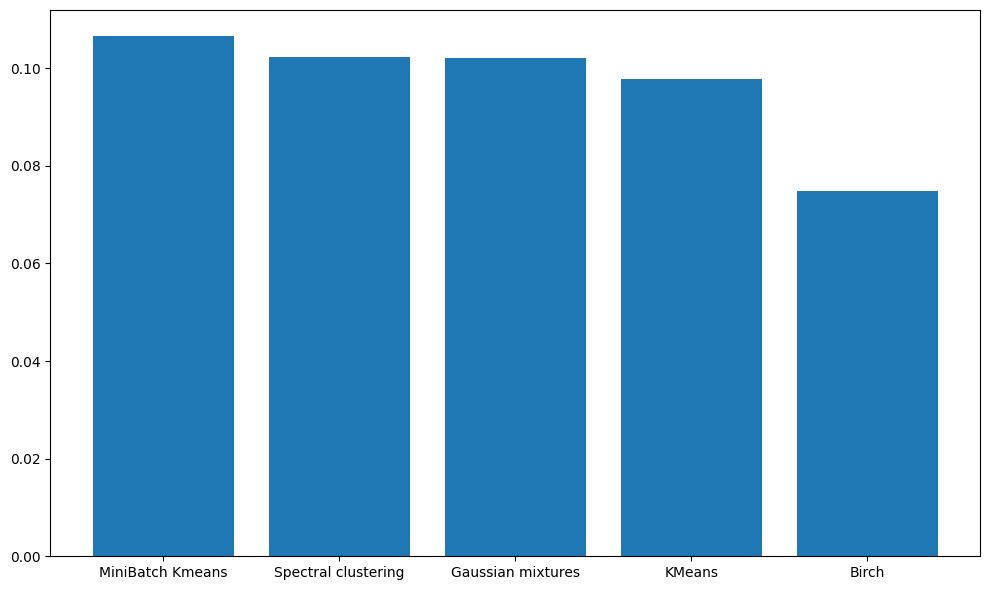

In [128]:
import matplotlib.pyplot as plt

models, scores = zip(*[(model['model'], model['score']) for model in model_scores])

plt.figure(figsize=(10, 6))
plt.bar(models, scores)
plt.tight_layout()
plt.show()